In [1]:
from bs4 import BeautifulSoup
import requests
import time
import random
import datetime
import smtplib
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager


<html class="a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.24.5-2024-06-27" lang="en-us">
 <!-- sp:feature:head-start -->
 <head>
  <script async="" crossorigin="anonymous" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js">
  </script>
  <script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js">
  </script>
  <style class="vjs-styles-defaults">
   .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
  </style>
  <style class="vjs-styles-dimensions">
   .aplus-645268-player-c13673e3-b6ee-4126-817f-10b15d29e2b8-container-element-di
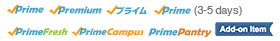

In [2]:
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run headless to not open a browser window
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36")


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


url = "https://www.amazon.com/Got-Data-MIS-Business-Analyst/dp/B08LL5V2BB?ref_=nav_custrec_signin"


driver.get(url)


time.sleep(random.uniform(1, 3))


page_source = driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')


print(soup.prettify())


driver.quit()

In [3]:
title=soup.find(id='productTitle').get_text()

In [4]:
title

'        Funny Got Data MIS Data Systems Business Analyst Premium T-Shirt       '

In [5]:
# price_element = soup.find(class_='a-price-whole')
# if price_element:
#     price = price_element.get_text()
#     print(price)
# else:
#     print("Price element not found")

In [6]:
price_element = soup.find(class_='a-price-whole')
price_element=price_element.get_text()
price_element

'9.'

In [7]:
# price_fraction = soup.find(class_='a-price-fraction')
# if price_fraction:
#     price = price_fraction.get_text()
#     print(price)
# else:
#     print("Price element not found")

In [8]:
price_fraction = soup.find(class_='a-price-fraction')
price_fraction=price_fraction.get_text()
price_fraction

'99'

In [9]:
price=price_element+price_fraction
price

'9.99'

In [10]:
type(price)

str

In [11]:
title.strip()

'Funny Got Data MIS Data Systems Business Analyst Premium T-Shirt'

In [12]:
title=title.strip()

In [13]:
title

'Funny Got Data MIS Data Systems Business Analyst Premium T-Shirt'

In [14]:
import csv

In [15]:
header=['title','price']
data=[title,price]


with open('AmazonWebscrapperDataset.csv','w',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(header) #inserts the headers
    writer.writerow(data)  #inserts the data
    

In [16]:
import datetime

In [17]:
from datetime import date

today = date.today()


today = today.strftime('%Y-%m-%d')
print(today) 

2024-07-18


In [18]:
header=['title','price','today']
data=[title,price,today]


with open('AmazonWebscrapperDataset.csv','w',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(header) #inserts the headers
    writer.writerow(data)  #inserts the data

In [28]:
import pandas as pd

df=pd.read_csv(r"C:\Users\Mahroosa\Desktop\Python new\AmazonWebscrapperDataset.csv")

In [29]:
df

,title,price,today
0,Funny Got Data MIS Data Systems Business Analy...,9.99,2024-07-18
1,Funny Got Data MIS Data Systems Business Analy...,9.99,2024-07-18
2,Funny Got Data MIS Data Systems Business Analy...,9.99,2024-07-18


In [30]:


with open('AmazonWebscrapperDataset.csv','a+',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(data)  #inserts the data

In [34]:
def check_price():
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


    url = "https://www.amazon.com/Got-Data-MIS-Business-Analyst/dp/B08LL5V2BB?ref_=nav_custrec_signin"


    driver.get(url)


    time.sleep(random.uniform(1, 3))


    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    
    driver.quit()    
    title=soup.find(id='productTitle').get_text()

    price_element = soup.find(class_='a-price-whole')
    price_element=price_element.get_text()
        

    price_fraction = soup.find(class_='a-price-fraction')
    price_fraction=price_fraction.get_text()

    from datetime import date

    today = date.today()


    today = today.strftime('%Y-%m-%d')

    import csv

    header=['title','price','today']
    data=[title,price,today]


    with open('AmazonWebscrapperDataset.csv','w',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)  
    

In [35]:
while(True):
    check_price()
    time.sleep(86400) #keeps collecting the prices everyday
    

KeyboardInterrupt: 